In [2]:
!pip uninstall -y deepul_helper
# 
# import os
# os.chdir('cs294-158-ssl')

Found existing installation: deepul_helper 0.1.0
Not uninstalling deepul-helper at /Users/yacineflici/Documents/master-vmi/s3/IFLCM010 Analyse d'images/TP5/self-supervised-learning/cs294-158-ssl, outside environment /Users/yacineflici/Documents/master-vmi/s3/IFLCM010 Analyse d'images/TP5/self-supervised-learning/cs294-158-ssl/.venv
Can't uninstall 'deepul_helper'. No files were found to uninstall.


In [3]:
!pip install matplotlib torch torchvision scikit-image opencv-python requests


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip


In [4]:
!pip install pycocotools


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip


In [5]:
import os 
os.chdir('.')
from deepul_helper.demos import load_model_and_data, evaluate_accuracy, display_nearest_neighbors, show_context_encoder_inpainting,evaluate_classifier
from deepul_helper.data import get_transform
%matplotlib inline

model, linear_classifier, train_loader, test_loader = load_model_and_data('puzzle')

# Get a single batch from the loader
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Select a single image from the batch
image = images[0]  # Shape: [C, H, W]

# Convert the image to the required format
image_np = image.permute(1, 2, 0).numpy()  # Convert from [C, H, W] to [H, W, C]

# Define `patch_dim` and `gap` if not set in your model
model.patch_dim = 96  # example value, adjust as per your requirement
model.gap = 4  # example value, adjust as needed

# Run the image through the model
output, output_fc6_uniform, output_fc6_random = model(image_np)

print("Model Output:", output)
print("Uniform Patch Embedding:", output_fc6_uniform)
print("Random Patch Embedding:", output_fc6_random)


Loading model for puzzle on cifar10
get_transform(cifar10, puzzle, True)


KeyboardInterrupt: 

In [1]:
import matplotlib.pyplot as plt
from deepul_helper.demos import load_model_and_data
# Load model and data
model, linear_classifier, train_loader, test_loader = load_model_and_data('puzzle',dataset='pascalvoc2012')

# Get a single batch from the loader
data_iter = iter(train_loader)
batch_uniform_patches, batch_random_patches, batch_labels = next(data_iter)  # Assuming your dataset __getitem__ returns these three

Loading model for puzzle on pascalvoc2012
get_transform(pascalvoc2012, puzzle, True)
Using downloaded and verified file: data/pascalvoc2012/VOCtrainval_11-May-2012.tar
Extracting data/pascalvoc2012/VOCtrainval_11-May-2012.tar to data/pascalvoc2012
get_transform(pascalvoc2012, puzzle, False)
Using downloaded and verified file: data/pascalvoc2012/VOCtrainval_11-May-2012.tar
Extracting data/pascalvoc2012/VOCtrainval_11-May-2012.tar to data/pascalvoc2012


/Users/yacineflici/Documents/master-vmi/s3/IFLCM010 Analyse d'images/TP5/self-supervised-learning/cs294-158-ssl/deepul_helper/demos.py:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental

In [2]:
batch_labels.shape

torch.Size([128])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8610327..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8335474..2.535425].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..2.535425].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.3301654..2.64].
Clipping input 

(96, 96, 3)
(96, 96, 3)
(96, 96, 3)
(96, 96, 3)
(96, 96, 3)


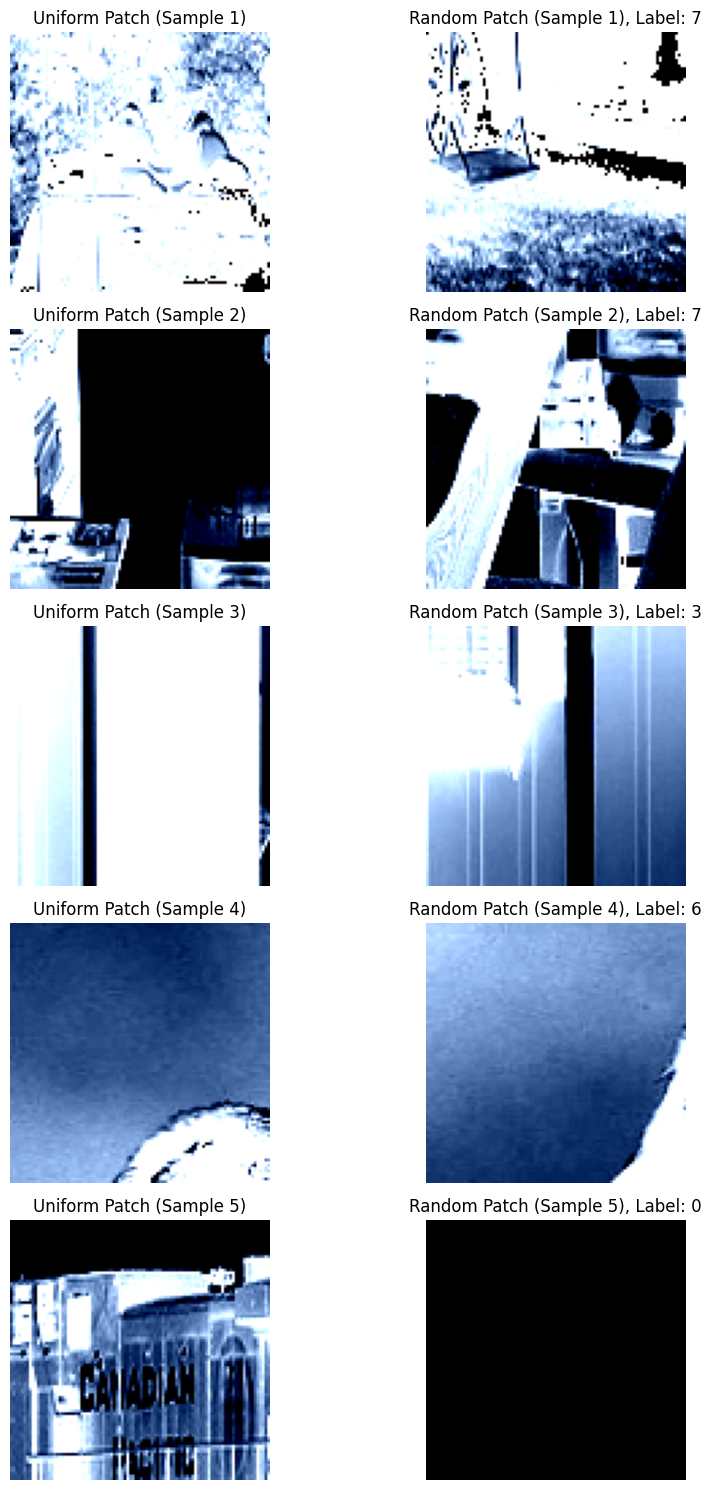

In [3]:
# Number of samples to display
num_samples = 5
%matplotlib inline
# Display uniform and random patches for the first `num_samples` in the batch
plt.figure(figsize=(10, num_samples * 3))
for i in range(num_samples):
    # Extract patches and label for the ith sample in the batch
    uniform_patch = batch_uniform_patches[i]
    random_patch = batch_random_patches[i]
    label = batch_labels[i]

    # Convert patches to numpy arrays for display
    uniform_patch_np = uniform_patch.permute(1, 2, 0).cpu().numpy()  # Convert [C, H, W] to [H, W, C]
    random_patch_np = random_patch.permute(1, 2, 0).cpu().numpy()    # Convert [C, H, W] to [H, W, C]

    # Display uniform patch
    plt.subplot(num_samples, 2, 2 * i + 1)
    plt.imshow(uniform_patch_np)
    plt.title(f"Uniform Patch (Sample {i + 1})")
    plt.axis('off')

    # Display random patch
    plt.subplot(num_samples, 2, 2 * i + 2)
    plt.imshow(random_patch_np)
    plt.title(f"Random Patch (Sample {i + 1}), Label: {label.tolist()}")
    plt.axis('off')
    print(uniform_patch_np.shape)
plt.tight_layout()
plt.show()